## Lab  - Linear regression

In this lab, you need to work with Students data and grades as labels for Portugese students.
Your task is to use KFold Cross Validation and fit a Linear model to predict the grades (G3) based on suitable input variables.

Your task involves using CrossValidation using KFold from sklearn library. Use n_splits as 5 and assign the object to variable <b>kfold_cv</b>

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/student-por.csv

Description is available here : https://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [17]:
# Import the library
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn import linear_model, metrics
import numpy as np 

import plotly.graph_objects as go

students_por_url = "https://raw.githubusercontent.com/colaberry/DSin100days/master/data/student-por.csv"
students = pd.read_csv(students_por_url,sep=';')
students.head()
students.shape
#Write your code here or in other code cells down

(649, 33)

In [2]:

students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# List out of all categorical variables
categorical_list = ["sex", 
                    "address",
                    "famsize",
                    "Pstatus", 
                    "Medu", 
                    "Fedu", 
                    "Mjob", 
                    "Fjob", 
                    "reason", 
                    "guardian", 
                    "schoolsup", 
                    "famsup", 
                    "paid", 
                    "activities", 
                    "nursery", 
                    "higher",
                    "internet", 
                    "romantic",
                    "famrel",
                    "freetime", 
                    "goout",
                    "Dalc",
                    "Walc",
                    "health", 
                    "traveltime",
                    "school"
                   ]

print("Total number of categorical columns {}".format(len(categorical_list)))

Total number of categorical columns 26


In [4]:
## Let us first get dummy indices for categorical variables
students_encoded = pd.get_dummies(students, columns=categorical_list)
students_encoded = students_encoded.dropna(subset=['G3'])
students_encoded['G3'].isnull().any()

False

In [5]:

# getting the datset ready 
y = students_encoded['G3']
X = students_encoded.drop(columns=["G3"])

# perform test train split 
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size=0.7, random_state=0, shuffle=True)

trainx_shape = train_x.shape
testx_shape = test_x.shape
trainy_shape = train_y.shape
testy_shape =test_y.shape

print("Training data X and y shapes are {} and {}".format(trainx_shape, trainy_shape))
print("Testing data X and y shapes are {} and {}".format(testx_shape, testy_shape))


Training data X and y shapes are (454, 93) and (454,)
Testing data X and y shapes are (195, 93) and (195,)


In [12]:
n_splits = 5
kfold =  KFold(n_splits=n_splits, shuffle=True, random_state=0)
store_models = []
rsq_store = []
for train_index, test_index in kfold.split(train_x): 
    train_kx, test_kx = train_x.iloc[train_index], train_x.iloc[test_index]
    train_ky, test_ky = train_y.iloc[train_index], train_y.iloc[test_index]
    lr = linear_model.LinearRegression()
    lr.fit(train_kx, train_ky)
    store_models.append(lr)
    predicted_values = lr.predict(test_x)
    r2 = metrics.r2_score(predicted_values, test_y)
    rsq_store.append(r2)


In [13]:
predictions = np.zeros((test_x.shape[0], n_splits))
for model_number, model in enumerate(store_models): 
    predictions[:,model_number] = model.predict(test_x)
    

In [16]:
mean_predictions = metrics.r2_score(np.mean(predictions, axis=1), test_y)

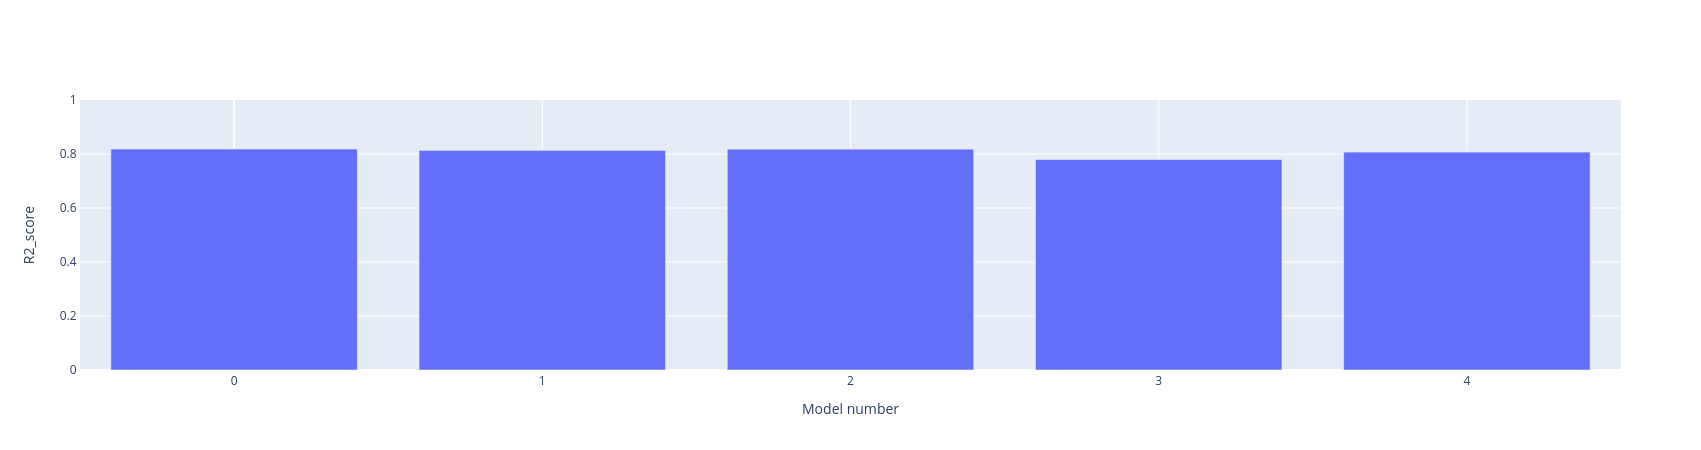

In [26]:
trace1 = go.Bar(x=[x for x in range(0,n_splits)], y=rsq_store, name="Models")
layout = go.Layout( xaxis_title="Model number", yaxis_title="R2_score", yaxis_range=[0,1] )
go.Figure(data=[trace1], layout=layout)


Here we can pick either the lowest $r^2$ model or take the average of all the predictions. The mean_predictions is the mean of predictions from all the models.